In [41]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset"

In [42]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
classes = os.listdir(dir_path)
print(classes)

['test', 'train', 'fruit.h5']


In [43]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/train"
classes = os.listdir(dir_path)
print(classes)

['Apple___Black_rot', 'Peach___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Apple___healthy', 'Peach___Bacterial_spot']


In [44]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test"
classes = os.listdir(dir_path)
print(classes)

['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___healthy', 'Peach___Bacterial_spot']


In [45]:
train = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/train" 
test = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test"

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [48]:
x_train=train_datagen.flow_from_directory(train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [49]:
model=Sequential()

In [50]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [51]:
model=load_model('/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/fruit.h5')

In [52]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/00f87dfc-bf6c-481e-9022-bfb98224d4b7___Rutg._Bact.S 1965.JPG")

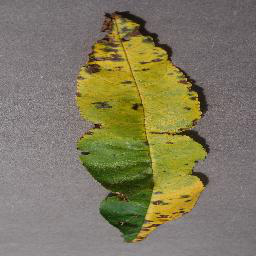

In [53]:
img

In [54]:
x=image.img_to_array(img)

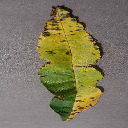

In [55]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/00f87dfc-bf6c-481e-9022-bfb98224d4b7___Rutg._Bact.S 1965.JPG",target_size=(128,128))
img

In [56]:
x=image.img_to_array(img)

In [57]:
x

array([[[114., 110., 111.],
        [113., 109., 110.],
        [114., 110., 111.],
        ...,
        [ 98.,  92.,  94.],
        [ 93.,  87.,  89.],
        [ 90.,  84.,  86.]],

       [[114., 110., 111.],
        [117., 113., 114.],
        [116., 112., 113.],
        ...,
        [ 97.,  91.,  93.],
        [ 92.,  86.,  88.],
        [ 91.,  85.,  87.]],

       [[120., 116., 117.],
        [120., 116., 117.],
        [126., 122., 123.],
        ...,
        [100.,  94.,  96.],
        [ 95.,  89.,  91.],
        [101.,  95.,  97.]],

       ...,

       [[149., 145., 146.],
        [147., 143., 144.],
        [142., 138., 139.],
        ...,
        [121., 117., 118.],
        [121., 117., 118.],
        [122., 118., 119.]],

       [[143., 139., 140.],
        [145., 141., 142.],
        [144., 140., 141.],
        ...,
        [123., 119., 120.],
        [121., 117., 118.],
        [118., 114., 115.]],

       [[149., 145., 146.],
        [148., 144., 145.],
        [145., 1

In [58]:
x=np.expand_dims(x,axis=0)

In [59]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 191ms/step


In [60]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [61]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [62]:
index[y[0]]

'Peach___Bacterial_spot'

In [63]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/00f87dfc-bf6c-481e-9022-bfb98224d4b7___Rutg._Bact.S 1965.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 84ms/step


'Peach___Bacterial_spot'

In [64]:
test_datagen_1=ImageDataGenerator(rescale=1)
test_generator_1=test_datagen_1.flow_from_directory(
    test,
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical'
)

Found 1686 images belonging to 6 classes.


In [65]:
model.evaluate(test_generator_1,steps=50)

50/50 [==============================] - 66s 1s/step - loss: 183.6682 - accuracy: 0.7430


[183.66818237304688, 0.7429999709129333]